In [6]:
# !pip install matplotlib seaborn scikit-learn jupyter streamlit
import matplotlib.pyplot as plt
from read_logs import read_log_file
import joblib
import numpy as np

In [9]:
# Make path notebook-friendly
import os
log_path = os.path.join("..", "data", "log_sample.txt")  # adjust if needed

def read_log_file(path=log_path):
    """Read log file into a DataFrame."""
    with open(path, 'r', encoding='utf-8') as file:
        lines = [line.strip() for line in file if line.strip()]
    # Example: logs in format: timestamp log_level message
    # Adjust parsing as per your log format
    df = pd.DataFrame([line.split(" ", 2) for line in lines], columns=['timestamp', 'log_level', 'message'])
    return df

df = read_log_file()
df.head()


,timestamp,log_level,message
0,2025-10-30,10:05:21,INFO User logged in successfully
1,2025-10-30,10:06:14,INFO Payment processed
2,2025-10-30,10:06:55,WARN High latency in service A
3,2025-10-30,10:07:03,INFO User logged out
4,2025-10-30,10:08:10,ERROR Service A timeout


In [18]:
vec = joblib.load("../tfidf_vectorizer.pkl")
model = joblib.load("../isolation_forest_model.pkl")



X = vec.transform(df["message"])
df["anomaly"] = model.predict(X.toarray())  # 1=normal, -1=anomaly
df["anomaly_score"] = model.decision_function(X.toarray())  # optional score
df.head(10)

,timestamp,log_level,message,anomaly,anomaly_score
0,2025-10-30,10:05:21,INFO User logged in successfully,1,0.094858
1,2025-10-30,10:06:14,INFO Payment processed,1,0.036886
2,2025-10-30,10:06:55,WARN High latency in service A,1,0.001056
3,2025-10-30,10:07:03,INFO User logged out,1,0.049702
4,2025-10-30,10:08:10,ERROR Service A timeout,1,0.041520
5,2025-10-30,10:08:45,ERROR Database connection failed,-1,-0.001584
6,2025-10-30,10:09:10,INFO User logged in successfully,1,0.094858


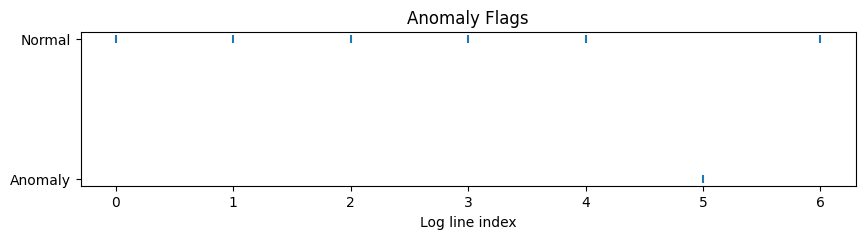

In [16]:
X = vec.transform(df["message"])
df["anomaly"] = model.predict(X.toarray())
plt.figure(figsize=(10,2))
plt.scatter(df.index, df["anomaly"], marker='|')
plt.yticks([-1,1], ["Anomaly","Normal"])
plt.xlabel("Log line index")
plt.title("Anomaly Flags")
plt.show()